In [ ]:
pip install tensorflow keras pandas matplotlib numpy scikit-learn seaborn opencv-python

In [ ]:
pip list

In [ ]:
pip --version

pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nih-chest-xrays/data")

print("Path to dataset files:", path)

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image

# Load the labels CSV
df = pd.read_csv('3/Data_Entry_2017.csv')
print(df.head())


        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN 

In [ ]:
# Separate multiple labels
all_labels = df['Finding Labels'].str.split('|').sum()
unique_labels = pd.Series(all_labels).value_counts()
print("Unique Labels and their counts:\n", unique_labels)

Unique Labels and their counts:
 No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: count, dtype: int64


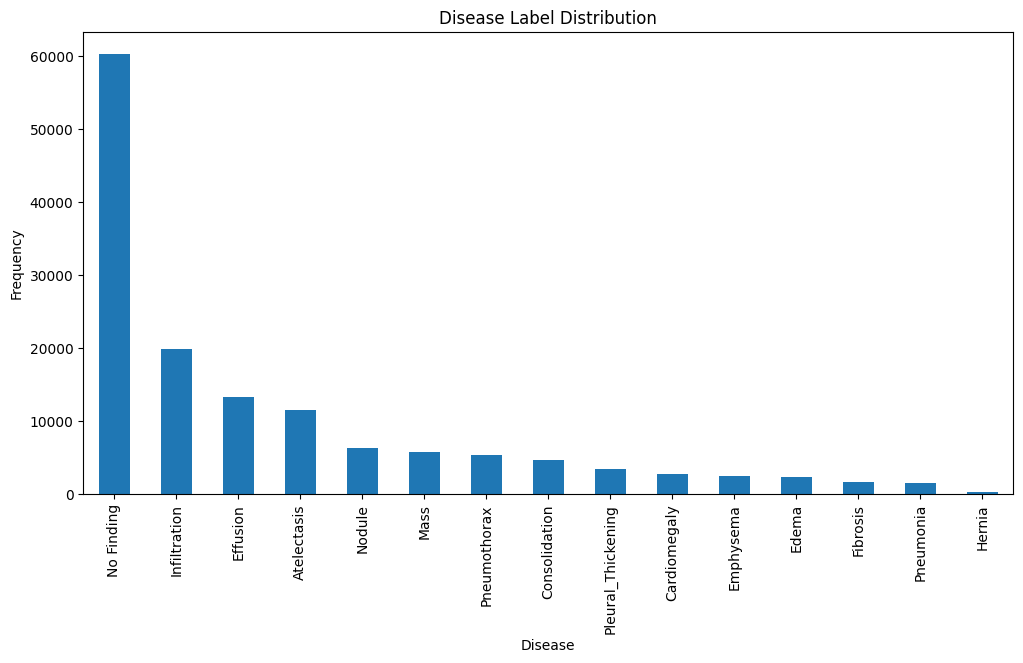

In [ ]:
# Plot label distribution
unique_labels.plot(kind='bar', figsize=(12, 6), title="Disease Label Distribution")
plt.xlabel("Disease")
plt.ylabel("Frequency")
plt.show()

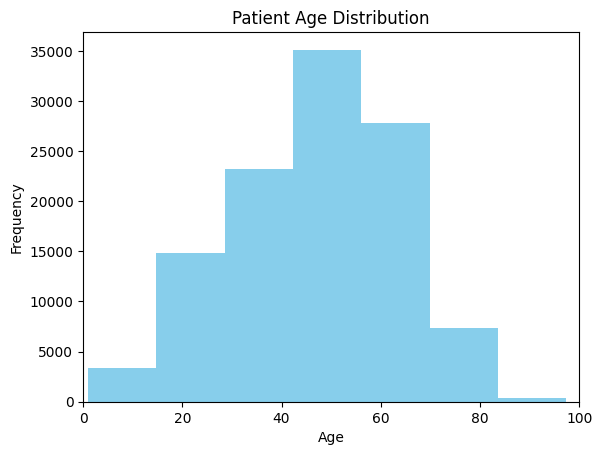

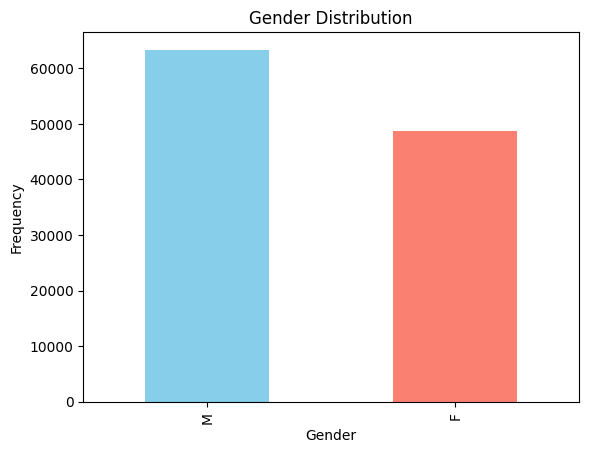

In [ ]:
# Plot patient age distribution
plt.hist(df['Patient Age'], bins=30, color='skyblue')
plt.xlim(0, 100)
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Plot gender distribution
df['Patient Gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# One-hot encode the labels
df_expanded = df['Finding Labels'].str.get_dummies(sep='|')
df = pd.concat([df, df_expanded], axis=1)

In [ ]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,0,1,0,0,0,0,0,0,0


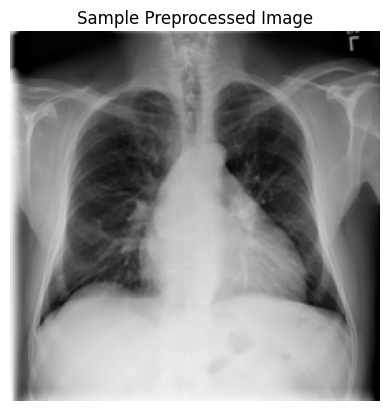

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_size = (224, 224)
image_path = '3/images_001/images/'

# Data generator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

# Function to load, resize, and preprocess images
def preprocess_image(image_name):
    img_path = os.path.join(image_path, image_name)
    image = Image.open(img_path).convert('RGB')
    image = image.resize(image_size)
    image_array = np.array(image) / 255.0  # normalize pixel values
    return image_array


sample_image = preprocess_image(df.loc[0, 'Image Index'])
plt.imshow(sample_image)
plt.title("Sample Preprocessed Image")
plt.axis('off')
plt.show()

In [ ]:
train_val_list_path = '3/train_val_list.txt'
test_list_path = '3/test_list.txt'

with open(train_val_list_path, 'r') as f:
    train_val_images = f.read().splitlines()

with open(test_list_path, 'r') as f:
    test_images = f.read().splitlines()

In [ ]:
# Map each image to its disease labels
label_map = {}
for _, row in df.iterrows():
    label_map[row['Image Index']] = row['Finding Labels']

In [ ]:
for image_name in train_val_images + test_images:
    print(f"{image_name}")

In [ ]:
import numpy as np
import os
from PIL import Image

# Define image parameters
base_dir = '3'
image_size = (224, 224)  # Resize all images to 224x224
preprocessed_dir = 'preprocessed_images'
os.makedirs(preprocessed_dir, exist_ok=True)  # Directory to save preprocessed images

# Loop through the folders from images_001 to images_012
for i in range(1, 13):
    folder_name = f"images_{i:03d}/images"  # Format folder name as images_001, images_002, etc.
    folder_path = os.path.join(base_dir, folder_name)

    # Check if the path exists to avoid errors
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist.")
        continue

    # Loop through each image file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.png'):
            image_path = os.path.join(folder_path, file_name)

            # Preprocess the image
            try:
                image = Image.open(image_path).convert('RGB')
                image = image.resize(image_size)
                image_array = np.array(image) / 255.0  # Normalize pixel values

                # Save preprocessed image as .npy
                np.save(os.path.join(preprocessed_dir, f"{file_name}.npy"), image_array)
                print(f"Processed and saved: {file_name}")
            except Exception as e:
                print(f"Error processing {file_name}: {e}")


In [ ]:
import numpy as np
import os
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Reduce rotation
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)


class ChestXRayDataGenerator(Sequence):
    def __init__(self, image_list, labels, batch_size, img_size, image_dir, is_training=False):
        self.image_list = image_list
        self.labels = labels
        self.batch_size = batch_size
        self.img_size = img_size
        self.image_dir = image_dir
        self.is_training = is_training


        self.datagen = train_datagen if is_training else val_test_datagen


        self.unique_labels = df['Finding Labels'].unique()  # List of unique labels
        self.num_classes = len(self.unique_labels)  # Number of classes

    def __len__(self):
        return int(np.ceil(len(self.image_list) / self.batch_size))

    def __getitem__(self, idx):
        # print(f"{self.num_classes}")
        batch_images = self.image_list[idx * self.batch_size : (idx + 1) * self.batch_size]
        batch_data = []
        batch_labels = []

        for image_name in batch_images:
            # print(f"{image_name}")
            npy_file_name = f"{image_name}.npy"
            npy_file_path = os.path.join(self.image_dir, npy_file_name)
            # print(f"{npy_file_path}")
            # Load the preprocessed .npy file
            image_array = np.load(npy_file_path)

            # Check if the image was successfully loaded
            # print(f"{image_array.shape} {self.img_size}")
            if image_array.shape != self.img_size + (3,):
                # print(f"{image_name} not successfully loaded")
                image_array = np.resize(image_array, self.img_size + (3,))

            # Get label in one-hot format
            label = self.labels.get(image_name, 'No Finding').split('|')
            label_vector = np.zeros(self.num_classes)  # Initialize one-hot vector

            for l in label:
                if l in self.unique_labels:  # Check if label exists
                    label_vector[np.where(self.unique_labels == l)[0][0]] = 1

            batch_data.append(image_array)
            batch_labels.append(label_vector)

        return np.array(batch_data), np.array(batch_labels)


image_dir = 'preprocessed_images'  # Base directory for .npy files
image_size = (224, 224)   # Desired image size
batch_size = 32            # Number of images per batch

# Create train and test generators
train_generator = ChestXRayDataGenerator(train_val_images, label_map, batch_size, image_size, image_dir, is_training=True)
test_generator = ChestXRayDataGenerator(test_images, label_map, batch_size, image_size, image_dir, is_training=False)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))  # Add more filters
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))  # Increase the number of neurons
    model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
    model.add(Dense(train_generator.num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (224, 224, 3)
model = create_model(input_shape)


base_model = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,  # or any desired number of epochs
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

In [ ]:
from itertools import combinations
from collections import Counter

# Count combinations of diseases (comorbidities)
comorbidities = Counter()
for labels in df['Finding Labels']:
    if len(labels) > 1:
        for combo in combinations(labels, 2):
            comorbidities[combo] += 1

# Display most common comorbidities
print("Top 10 Comorbidities:")
print(comorbidities.most_common(10))

Top 10 Comorbidities:
[(('i', 'n'), 302338), (('o', 'n'), 208497), (('o', 'i'), 173462), (('n', 'i'), 139782), (('i', 'g'), 134460), (('i', 'i'), 133204), (('n', 'g'), 130355), (('F', 'i'), 125156), (('N', 'n'), 122027), (('F', 'n'), 121874)]


In [ ]:
import cv2
import numpy as np


image_dir = 'dataset/3'

sample_images = df['Image Index'].sample(100)
aspect_ratios = []

for image_name in sample_images:
    image_path = os.path.join(image_dir, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        aspect_ratio = image.shape[1] / image.shape[0]  # width / height
        aspect_ratios.append(aspect_ratio)

# Plot aspect ratios
plt.figure(figsize=(10, 5))
plt.hist(aspect_ratios, bins=20, color="skyblue")
plt.title("Distribution of Aspect Ratios in Sample Images")
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
if 'Patient Age' in df.columns:
    age_labels = df.explode('Finding Labels')
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=age_labels, x='Finding Labels', y='Patient Age', palette="coolwarm")
    plt.xticks(rotation=45)
    plt.ylim(0, 150)  # Set y-axis limit to 150
    plt.title('Disease Frequency by Patient Age')
    plt.xlabel('Disease')
    plt.ylabel('Patient Age')
    plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D


In [ ]:
def create_transfer_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)  # Multi-label classification
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the convolutional base
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
num_classes = train_generator.num_classes
input_shape = (224, 224, 3)
transfer_model = create_transfer_model(input_shape, num_classes)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping


In [ ]:
def lr_schedule(epoch, lr):
    if epoch > 10:
        return lr * 0.1
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
history = transfer_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[lr_scheduler, early_stopper]
)

Epoch 1/20
2704/2704 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.5463 - loss: 0.0219

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2704/2704 ━━━━━━━━━━━━━━━━━━━━ 993s 361ms/step - accuracy: 0.5463 - loss: 0.0219 - val_accuracy: 0.3853 - val_loss: 0.0052 - learning_rate: 0.0010
Epoch 2/20
2704/2704 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate
  current = self.get_monitor_value(logs)


2704/2704 ━━━━━━━━━━━━━━━━━━━━ 938s 346ms/step - accuracy: 0.5881 - loss: 0.0035 - val_accuracy: 0.3853 - val_loss: 0.0049 - learning_rate: 0.0010
Epoch 4/20
2704/2704 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
2704/2704 ━━━━━━━━━━━━━━━━━━━━ 976s 360ms/step - accuracy: 0.5846 - loss: 0.0035 - val_accuracy: 0.3852 - val_loss: 0.0049 - learning_rate: 0.0010
Epoch 6/20
2704/2704 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/20
2704/2704 ━━━━━━━━━━━━━━━━━━━━ 1013s 374ms/step - accuracy: 0.5822 - loss: 0.0034 - val_accuracy: 0.3853 - val_loss: 0.0050 - learning_rate: 0.0010
Epoch 8/20
2704/2704 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/20
2704/2704 ━━━━━━━━━━━━━━━━━━━━ 1019s 376ms/step - accuracy: 0.5792 - loss: 0.0034 - val_accuracy: 0.3842 - val_loss: 0.0047 - learning_rate: 0.0010
Epoch 10/20
270

In [ ]:
# Save the trained model
transfer_model.save('vgg16_chestxray_model.h5')

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report
import numpy as np


In [ ]:
# Get the list of unique diseases (classes)
unique_labels = list(df_expanded.columns)  # Adjust to the correct column names for one-hot encoding
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
num_classes = len(unique_labels)

# Convert test image labels to one-hot encoded vectors
y_true = np.zeros((len(test_images), num_classes))  # Initialize an array for multi-labels
for idx, img in enumerate(test_images):
    labels = label_map.get(img, 'No Finding').split('|')  # Get labels for each image
    for label in labels:
        if label in label_to_index:  # Skip labels not in the defined classes
            y_true[idx, label_to_index[label]] = 1

# Get predictions
y_pred = transfer_model.predict(test_generator)

# Ensure shapes match
print("Shape of y_true:", y_true.shape)
print("Shape of y_pred:", y_pred.shape)

# Evaluate the model using metrics like AUC-ROC, precision, recall, F1-score
from sklearn.metrics import roc_auc_score, classification_report

# AUC-ROC for each class
auc_scores = {}
for i, label in enumerate(unique_labels):
    try:
        auc_scores[label] = roc_auc_score(y_true[:, i], y_pred[:, i])
    except ValueError:
        auc_scores[label] = None  # Handle cases where only one class is present

print("AUC-ROC scores for each class:")
for label, auc in auc_scores.items():
    print(f"{label}: {auc}")




800/800 ━━━━━━━━━━━━━━━━━━━━ 243s 303ms/step
Shape of y_true: (25596, 15)
Shape of y_pred: (25596, 836)
AUC-ROC scores for each class:
Atelectasis: 0.5823522352372985
Cardiomegaly: 0.5199946886581494
Consolidation: 0.5626172385923295
Edema: 0.3420592072758584
Effusion: 0.5555480951121061
Emphysema: 0.643130297654984
Fibrosis: 0.5839849301532614
Hernia: 0.3429703809723501
Infiltration: 0.590407677604446
Mass: 0.6107535582909916
No Finding: 0.33090140432146653
Nodule: 0.5272780306680506
Pleural_Thickening: 0.5448513564275409
Pneumonia: 0.566049120883193
Pneumothorax: 0.6780355423068292
